# Diabetes Prediction

> <b>Dataset used</b>: Pima Indians Diabetes Dataset (https://www.kaggle.com/uciml/pima-indians-diabetes-database)<br> <br>
> <b>Steps followed </b> : <ol>
    <li>Import data</li>
    <li>Clean the data</li>
    <li>Perform EDA</li>
    <li>Prep data for training-testing</li>
    <li>Apply Models</li>
    <li>Evaluate the Performance</li>
    <li>Hyperparamter Tuning</li>
</ol> 


---

In [1]:
#Data Wrangling & Analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importing the dataset

In [2]:
df = pd.read_csv('../dataset/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
df.head()               #returns first 5 rows of our dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()                           #gives us an idea about the datatypes of values in dataset and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()              #gives us a lot of useful information like mean, std. deviation, quartiles, outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Cleaning the data

In [6]:
for val in df.columns:                           #We check the number of data points that are 0
    print(val, len(df[df[val] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


These 0 values need to be replaced with NaN which will later be imputed (0 of Pregnancies is a categorical value)

In [7]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 
                                                                          'BloodPressure', 
                                                                          'SkinThickness', 
                                                                          'Insulin', 
                                                                          'BMI']].replace(0, np.nan)

In [8]:
df.isnull().sum()                         #isnull() checks for NaN and sum() gives us a total count of NaN values.

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The data has been cleaned. Now we will perform EDA

## 3. Performing Exploratory Data Analysis

<AxesSubplot:>

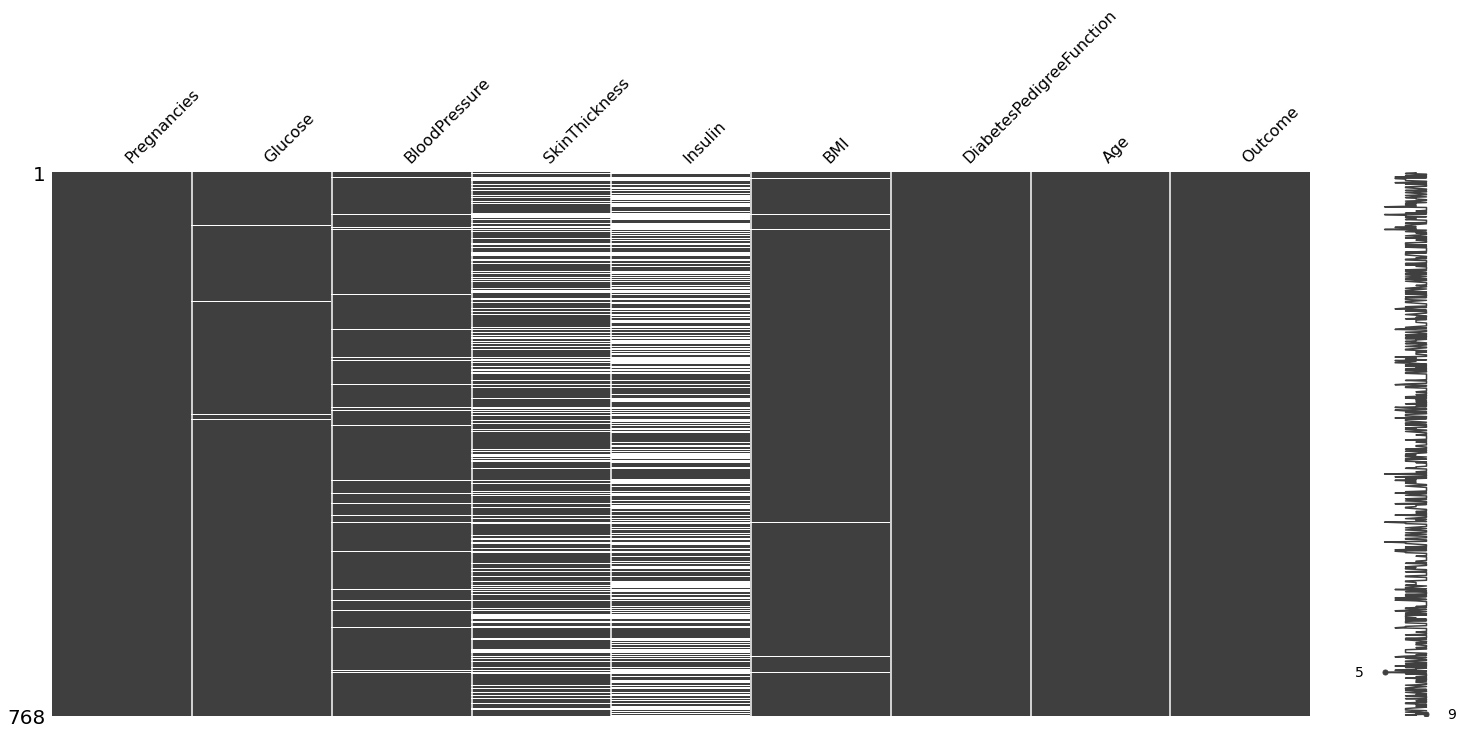

In [9]:
missingno.matrix(df)                                #visualising NaN values in dataset

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

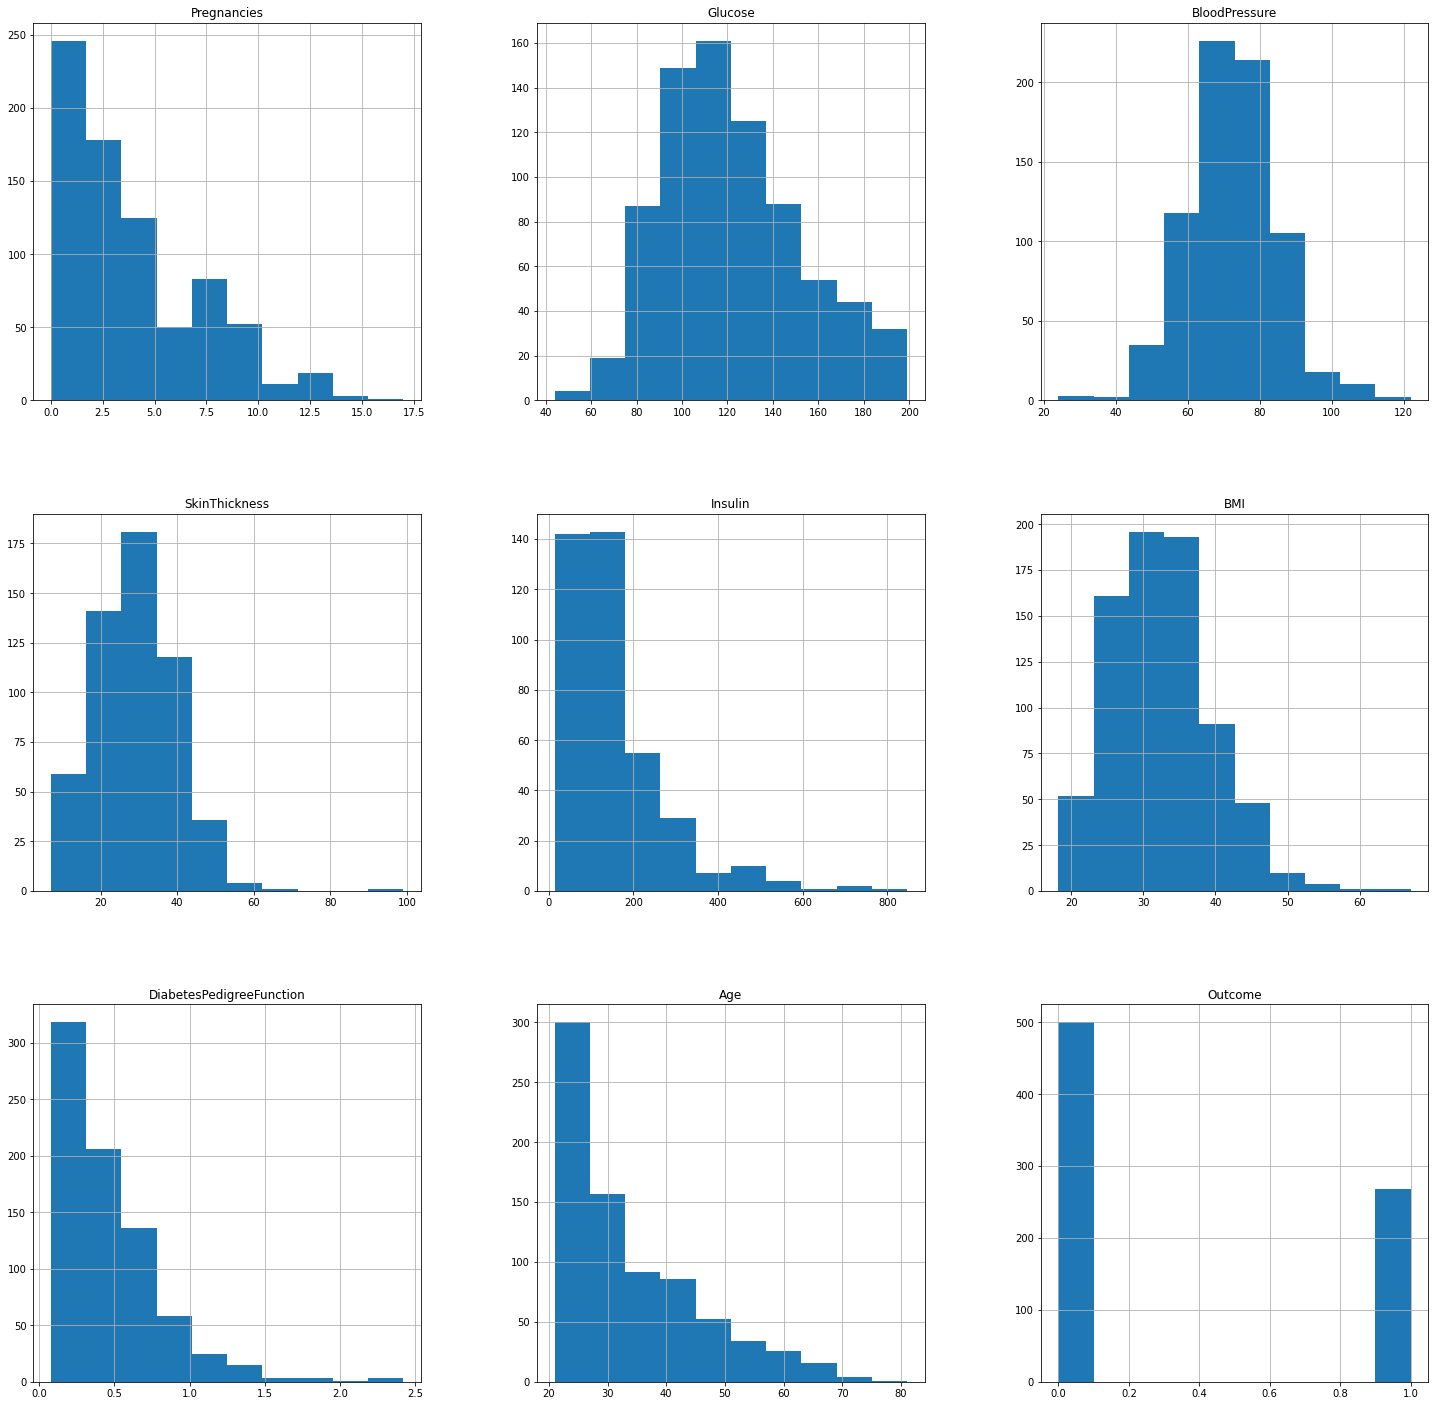

In [10]:
df.hist(figsize = (25,25))                             #gives description about data distribution

Using this information on the distributions we can impute values of the following : <br>
Glucose || BloodPressure || SkinThickness || Insulin || BMI

In [11]:
#Imputing the NaN values 

df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [12]:
df.isnull().sum()            #We ensure that we no longer have NaN values in our dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

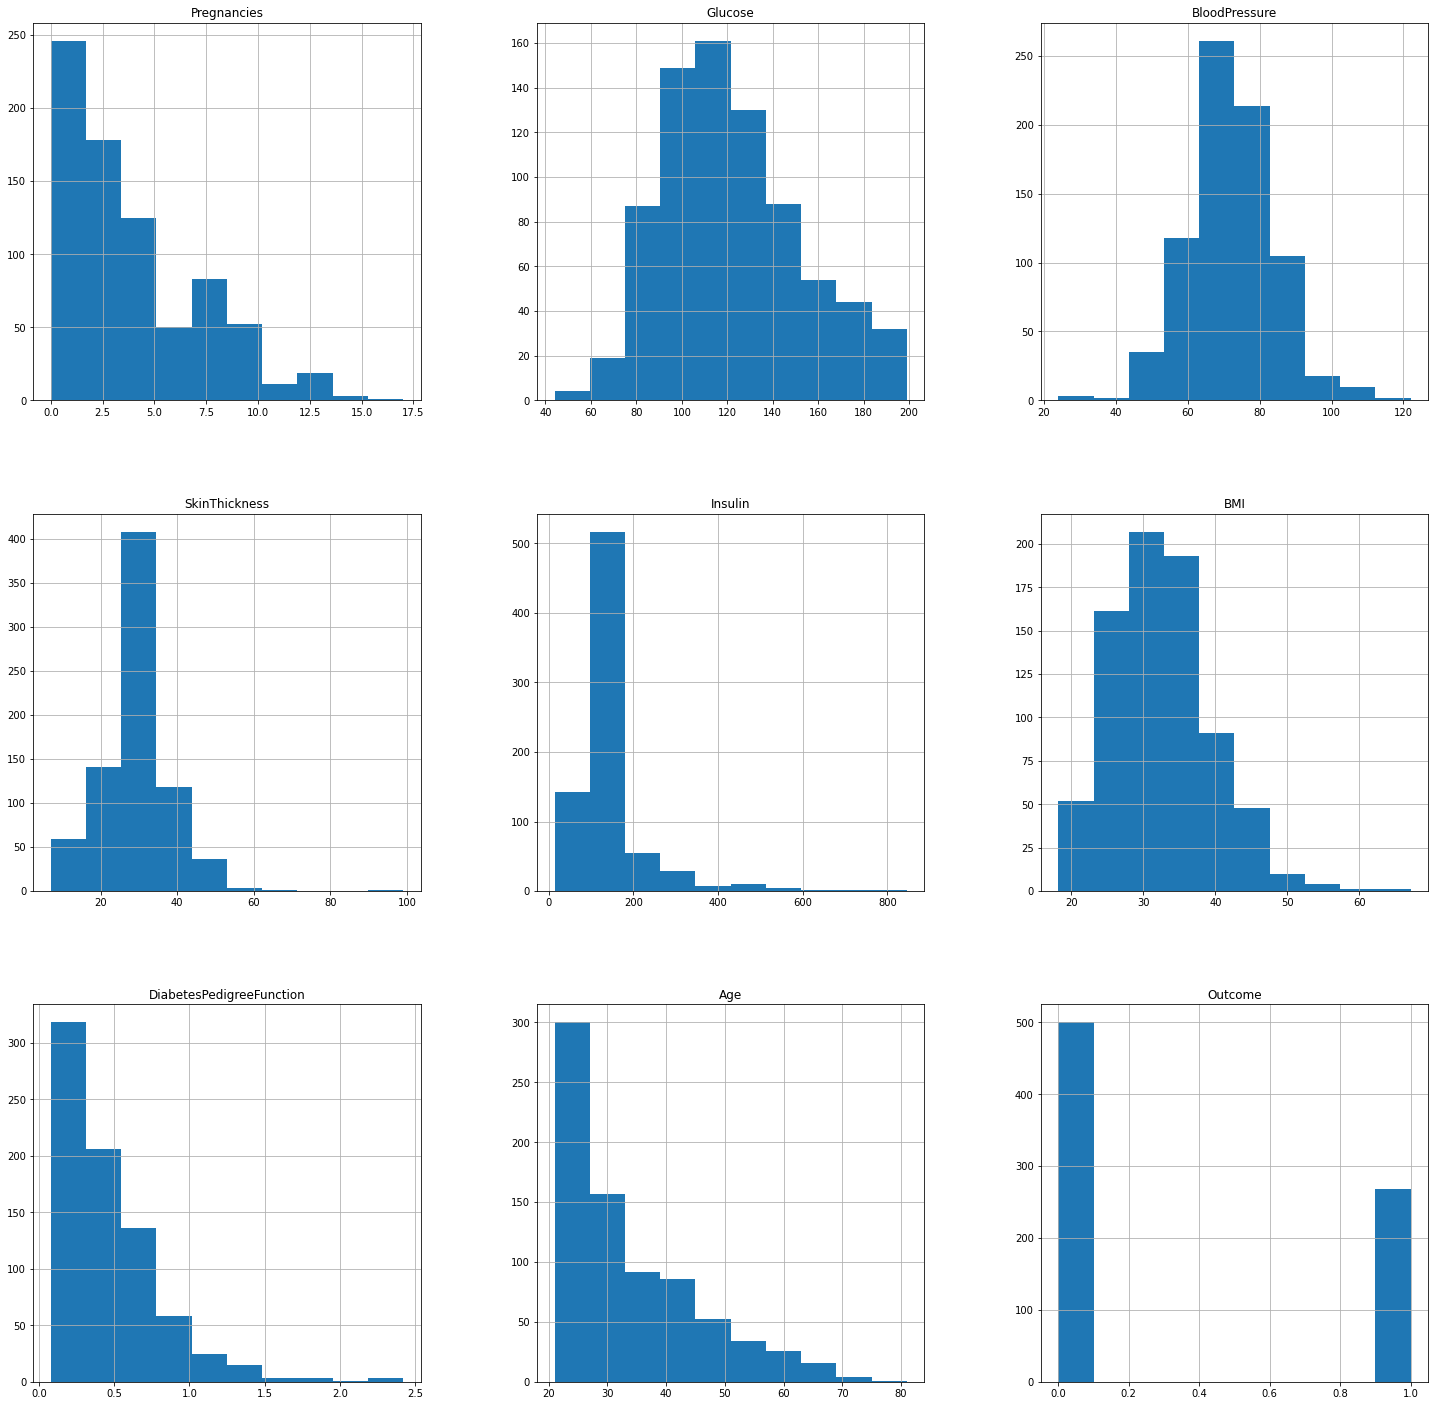

In [13]:
#Distribution after Imputation

df.hist(figsize = (25,25))

In [14]:
ct = df['Outcome'].value_counts()                     #number of 0 and 1 in 'Outcome' feature
ct

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

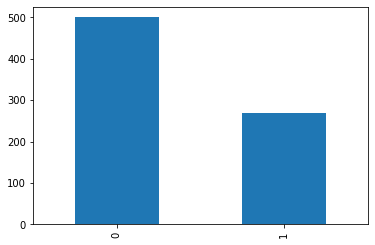

In [15]:
ct.plot(kind = 'bar')

Text(0.5, 1.0, 'BMI vs Outcome')

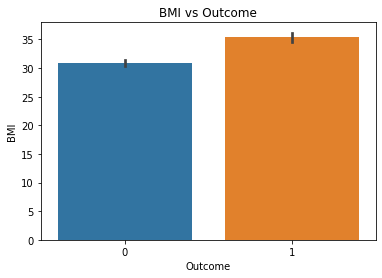

In [16]:
sns.barplot(x='Outcome', y='BMI', data = df)
plt.ylabel('BMI')
plt.title('BMI vs Outcome')

Text(0.5, 1.0, 'Age vs Outcome')

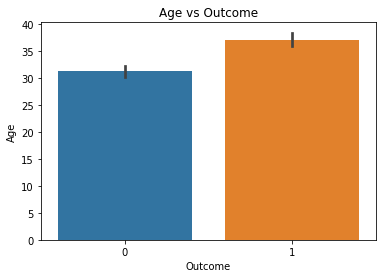

In [17]:
sns.barplot(x='Outcome', y='Age', data = df)
plt.ylabel('Age')
plt.title('Age vs Outcome')

Text(0.5, 1.0, 'BMI vs Outcome')

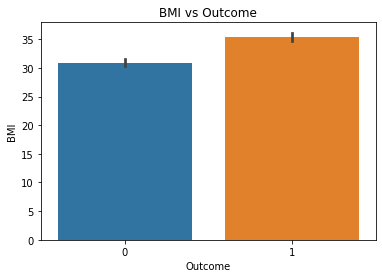

In [18]:
sns.barplot(x='Outcome', y='BMI', data = df)
plt.ylabel('BMI')
plt.title('BMI vs Outcome')

Text(0.5, 1.0, 'DPF vs Outcome')

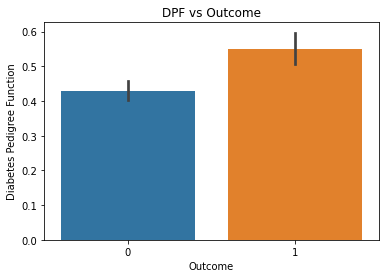

In [19]:
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data = df)
plt.ylabel('Diabetes Pedigree Function')
plt.title('DPF vs Outcome')

<AxesSubplot:>

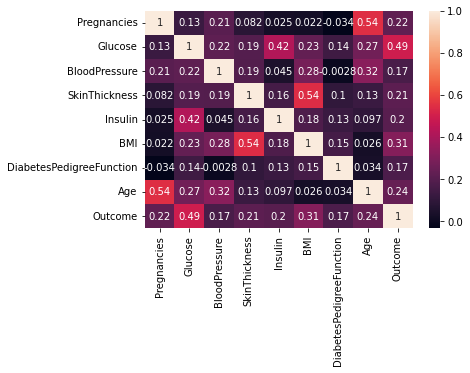

In [20]:
sns.heatmap(df.corr(), annot=True)           #correlation of features plotted as a heatmap with annotations

## 4. Prepping the data for Training

In [21]:
X = df.iloc[:,:-1]                      #Independent features
X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [22]:
y = df.iloc[:,-1]                      #Dependent Feature
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.405184,29.0,125.0,32.3,0.304,21
618,9,112.0,82.000000,24.0,125.0,28.2,1.282,50
346,1,139.0,46.000000,19.0,83.0,28.7,0.654,22
294,0,161.0,50.000000,29.0,125.0,21.9,0.254,65
231,6,134.0,80.000000,37.0,370.0,46.2,0.238,46


In [25]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.0,58.0,33.0,190.0,34.0,0.430,43
324,2,112.0,75.0,32.0,125.0,35.7,0.148,21
624,2,108.0,64.0,29.0,125.0,30.8,0.158,21
690,8,107.0,80.0,29.0,125.0,24.6,0.856,34
473,7,136.0,90.0,29.0,125.0,29.9,0.210,50


In [26]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [27]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Applying Models

### 5.1. Logistic Regression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_train, y_train)*100, 2)
acc_lr

77.2

### 5.2. Support Vector Machine

In [30]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
acc_svc

83.06

### 5.3. KNN

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
acc_knn

82.74

### 5.4. Gaussian Naive Bayes

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train)*100, 2)
acc_gnb

74.92

## 6. Evaluating the Models

In [33]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
len(classifiers)

4

In [34]:
validation_results = []
for classifier in classifiers:
    validation_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))

In [35]:
cv_mean=[]
cv_std=[]
for result in validation_results:
    cv_mean.append(result.mean())
    cv_std.append(result.std())

In [36]:
cv_res = pd.DataFrame({'Cross Validation Mean' : cv_mean, 'Cross Validation Std' : cv_std, 'Algorithms' : ['Logistic Regression', 'Support Vector Machine', 'KNN', 'GaussianNB']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithms
0,0.767081,0.036389,Logistic Regression
1,0.763749,0.035551,Support Vector Machine
2,0.746034,0.043635,KNN
3,0.744289,0.044169,GaussianNB


## 6. Hyperparameter Tuning of SVM

In [37]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
             'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.756 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.797 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.779 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
print('Best Parameters : ', grid.best_params_)
print('Best Estimator : ', grid.best_estimator_)

Best Parameters :  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimator :  SVC(C=1000, gamma=0.01)


In [39]:
svc = SVC(C = 1000, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,y_train)*100,2)
acc_svc

83.71

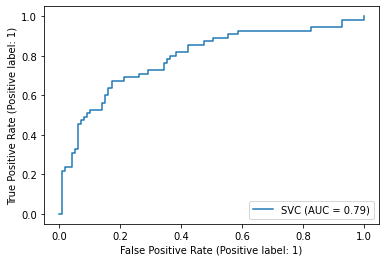

In [40]:
metrics.plot_roc_curve(svc, X_test, y_test)
plt.show()

Our Model Accuracy has slightly improved.